# 0. Imports

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# 1. Data Load

In [ ]:
customer_df = pd.read_csv("../dataset/clustering_customer.csv")
features_df= pd.read_csv("../dataset/clustering_features.csv")
payment_df= pd.read_csv("../dataset/clustering_payment.csv")
product_df= pd.read_csv("../dataset/clustering_product.csv")

In [4]:
customer_df.shape, features_df.shape, product_df.shape, payment_df.shape

((1000, 5), (1000, 27), (22, 3), (5, 2))

In [5]:
customer_df.head()

,customer_id,age,hh_income,omni_shopper,email_subscribed
0,1,46,640000,0,0
1,2,32,890000,1,1
2,3,45,772000,0,0
3,4,46,303000,0,1
4,5,38,412000,0,0


In [84]:
pd.set_option("display.max_columns", None)
features_df.head()


,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,NaN,0.450939,NaN,0.068894,0.363636,NaN,0.363636,NaN,0.272727,NaN,0.519833,0.167015,0.313152,NaN,False,False
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,NaN,0.247144,NaN,0.031153,0.466667,NaN,0.333333,NaN,0.200000,0.031153,0.704050,0.186916,0.077882,NaN,True,True
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,NaN,0.263711,0.309218,0.147025,0.280047,False,False
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,NaN,True,False
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,NaN,0.264706,0.735294,NaN,NaN,NaN,0.375000,0.625000,NaN,NaN,NaN,NaN,0.735294,0.264706,NaN,False,False


In [87]:
product_df.head()

,product_id,category,price
0,True,A,450
1,True,B,80
2,True,C,250
3,True,D,400
4,True,E,50


In [83]:
payment_df.head()

,payment_type_id,payment_type
0,True,cash
1,True,credit card
2,True,debit card
3,True,gift card
4,True,others


# 2. Descriptive Analysis & Missing values handling

## 2.1 Data type handling

In [13]:
features_df.dtypes

customer_id                   int64
sales                         int64
units                         int64
orders                        int64
unique_products_bought        int64
unique_payments_used          int64
unique_categories_bought      int64
aov                         float64
aur                         float64
upt                         float64
category_a_sales            float64
category_b_sales            float64
category_c_sales            float64
category_d_sales            float64
category_e_sales            float64
category_a_units            float64
category_b_units            float64
category_c_units            float64
category_d_units            float64
category_e_units            float64
payment_cash                float64
payment_credit              float64
payment_debit               float64
payment_gc                  float64
payment_others              float64
email_subscribed              int64
omni_shopper                  int64
dtype: object

In [30]:
binary_cols = ['omni_shopper', 'email_subscribed']
string_cols = ['customer_id']


features_df[binary_cols] = features_df[binary_cols].astype(bool)
features_df[string_cols] = features_df[string_cols].astype(str)

In [16]:
customer_df.dtypes

customer_id         int64
age                 int64
hh_income           int64
omni_shopper        int64
email_subscribed    int64
dtype: object

In [23]:
customer_df[binary_cols] = customer_df[binary_cols].astype(bool)
customer_df[string_cols] = customer_df[string_cols].astype(str)

In [25]:
payment_df.dtypes

payment_type_id     int64
payment_type       object
dtype: object

In [34]:
binary_cols_payment = ['payment_type_id']
payment_df[binary_cols_payment] = payment_df[binary_cols_payment].astype(str)

In [31]:
product_df.dtypes

product_id     int64
category      object
price          int64
dtype: object

In [35]:
binary_cols_product = ['product_id']

product_df[binary_cols_product] = product_df[binary_cols_product].astype(str)

In [33]:
product_df.dtypes

product_id      bool
category      object
price          int64
dtype: object

## 2.2 Handling null values

In [36]:
features_df.isnull().sum()

customer_id                   0
sales                         0
units                         0
orders                        0
unique_products_bought        0
unique_payments_used          0
unique_categories_bought      0
aov                           0
aur                           0
upt                           0
category_a_sales             89
category_b_sales            246
category_c_sales            171
category_d_sales            322
category_e_sales            329
category_a_units             89
category_b_units            246
category_c_units            171
category_d_units            322
category_e_units            329
payment_cash                737
payment_credit               19
payment_debit               129
payment_gc                  366
payment_others              744
email_subscribed              0
omni_shopper                  0
dtype: int64

In [51]:
features_df2 = features_df.copy()
product_df2 = product_df.copy()
payment_df2 = payment_df.copy()
customer_df2 = customer_df.copy()



features_df2 = features_df2.fillna(0)

In [ ]:
product_df2.isnull().sum()

product_id    0
category      0
price         0
dtype: int64

In [ ]:
customer_df2.isnull().sum()

customer_id         0
age                 0
hh_income           0
omni_shopper        0
email_subscribed    0
dtype: int64

In [ ]:
payment_df2.isnull().sum()

payment_type_id    0
payment_type       0
dtype: int64

In [52]:
features_df2.describe().T


,count,mean,std,min,25%,50%,75%,max
sales,1000.0,5707.170000,4036.079859,330.0,2827.500000,4280.000000,7267.500000,17635.000000
units,1000.0,21.108000,14.408398,3.0,11.000000,16.000000,23.000000,58.000000
orders,1000.0,9.811000,6.384986,3.0,5.000000,8.000000,10.000000,24.000000
unique_products_bought,1000.0,7.547000,3.850535,2.0,5.000000,6.000000,9.000000,18.000000
unique_payments_used,1000.0,3.005000,0.948617,1.0,2.000000,3.000000,4.000000,5.000000
unique_categories_bought,1000.0,3.843000,1.014584,1.0,3.000000,4.000000,5.000000,5.000000
aov,1000.0,575.336384,165.741267,110.0,467.500000,568.444444,670.238095,1202.500000
aur,1000.0,271.150530,65.941495,60.0,227.836538,268.178138,311.271777,485.000000
upt,1000.0,2.124689,0.344007,1.0,1.900000,2.139610,2.333333,3.666667
category_a_sales,1000.0,0.423622,0.232920,0.0,0.270173,0.428711,0.585021,1.000000


# 3. Feature Engineering

In [53]:
features_df3 = features_df2.copy()
product_df3 = product_df2.copy()
payment_df3 = payment_df2.copy()
customer_df3 = customer_df2.copy()

In [85]:
pd.set_option("display.max_columns", None)
features_df3.head()

,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper,category_buy_rate,payment_use_rate,product_buy_rate
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,0.000000,0.450939,0.000000,0.068894,0.363636,0.000000,0.363636,0.000000,0.272727,0.000000,0.519833,0.167015,0.313152,0.000000,False,False,0.6,0.6,0.227273
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,0.000000,0.247144,0.000000,0.031153,0.466667,0.000000,0.333333,0.000000,0.200000,0.031153,0.704050,0.186916,0.077882,0.000000,True,True,0.6,0.8,0.272727
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,0.000000,0.263711,0.309218,0.147025,0.280047,False,False,1.0,0.8,0.409091
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,0.000000,True,False,1.0,0.8,0.681818
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,0.000000,0.264706,0.735294,0.000000,0.000000,0.000000,0.375000,0.625000,0.000000,0.000000,0.000000,0.000000,0.735294,0.264706,0.000000,False,False,0.4,0.4,0.136364


In [76]:
total_categories = product_df3['category'].nunique()
total_payment = product_df3['category'].nunique()
total_products = len(product_df3['category'])


In [ ]:
#Adding new features

# They will indicate a % rate from all available options each customer have used once
features_df3['category_buy_rate'] = features_df3['unique_categories_bought']/total_categories
features_df3['payment_use_rate'] = features_df3['unique_payments_used']/total_payment
features_df3['product_buy_rate'] = features_df3['unique_products_bought']/total_products

In [105]:
features_df3 = features_df3.merge(
    customer_df3[['customer_id', 'age', 'hh_income']],
    on="customer_id",
    how="left"
);
features_df3.head()

,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper,category_buy_rate,payment_use_rate,product_buy_rate,age,hh_income
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,0.000000,0.450939,0.000000,0.068894,0.363636,0.000000,0.363636,0.000000,0.272727,0.000000,0.519833,0.167015,0.313152,0.000000,False,False,0.6,0.6,0.227273,46,640000
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,0.000000,0.247144,0.000000,0.031153,0.466667,0.000000,0.333333,0.000000,0.200000,0.031153,0.704050,0.186916,0.077882,0.000000,True,True,0.6,0.8,0.272727,32,890000
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,0.000000,0.263711,0.309218,0.147025,0.280047,False,False,1.0,0.8,0.409091,45,772000
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,0.000000,True,False,1.0,0.8,0.681818,46,303000
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,0.000000,0.264706,0.735294,0.000000,0.000000,0.000000,0.375000,0.625000,0.000000,0.000000,0.000000,0.000000,0.735294,0.264706,0.000000,False,False,0.4,0.4,0.136364,38,412000


# 4.0 EDA

In [106]:
features_df4 = features_df3.copy()
product_df4 = product_df3.copy()
payment_df4 = payment_df3.copy()
customer_df4 = customer_df3.copy()

In [102]:
features_df4.head()
features_df3.head()

,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper,category_buy_rate,payment_use_rate,product_buy_rate
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,0.000000,0.450939,0.000000,0.068894,0.363636,0.000000,0.363636,0.000000,0.272727,0.000000,0.519833,0.167015,0.313152,0.000000,False,False,0.6,0.6,0.227273
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,0.000000,0.247144,0.000000,0.031153,0.466667,0.000000,0.333333,0.000000,0.200000,0.031153,0.704050,0.186916,0.077882,0.000000,True,True,0.6,0.8,0.272727
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,0.000000,0.263711,0.309218,0.147025,0.280047,False,False,1.0,0.8,0.409091
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,0.000000,True,False,1.0,0.8,0.681818
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,0.000000,0.264706,0.735294,0.000000,0.000000,0.000000,0.375000,0.625000,0.000000,0.000000,0.000000,0.000000,0.735294,0.264706,0.000000,False,False,0.4,0.4,0.136364


## 4.1 Hypothesis Mindmap

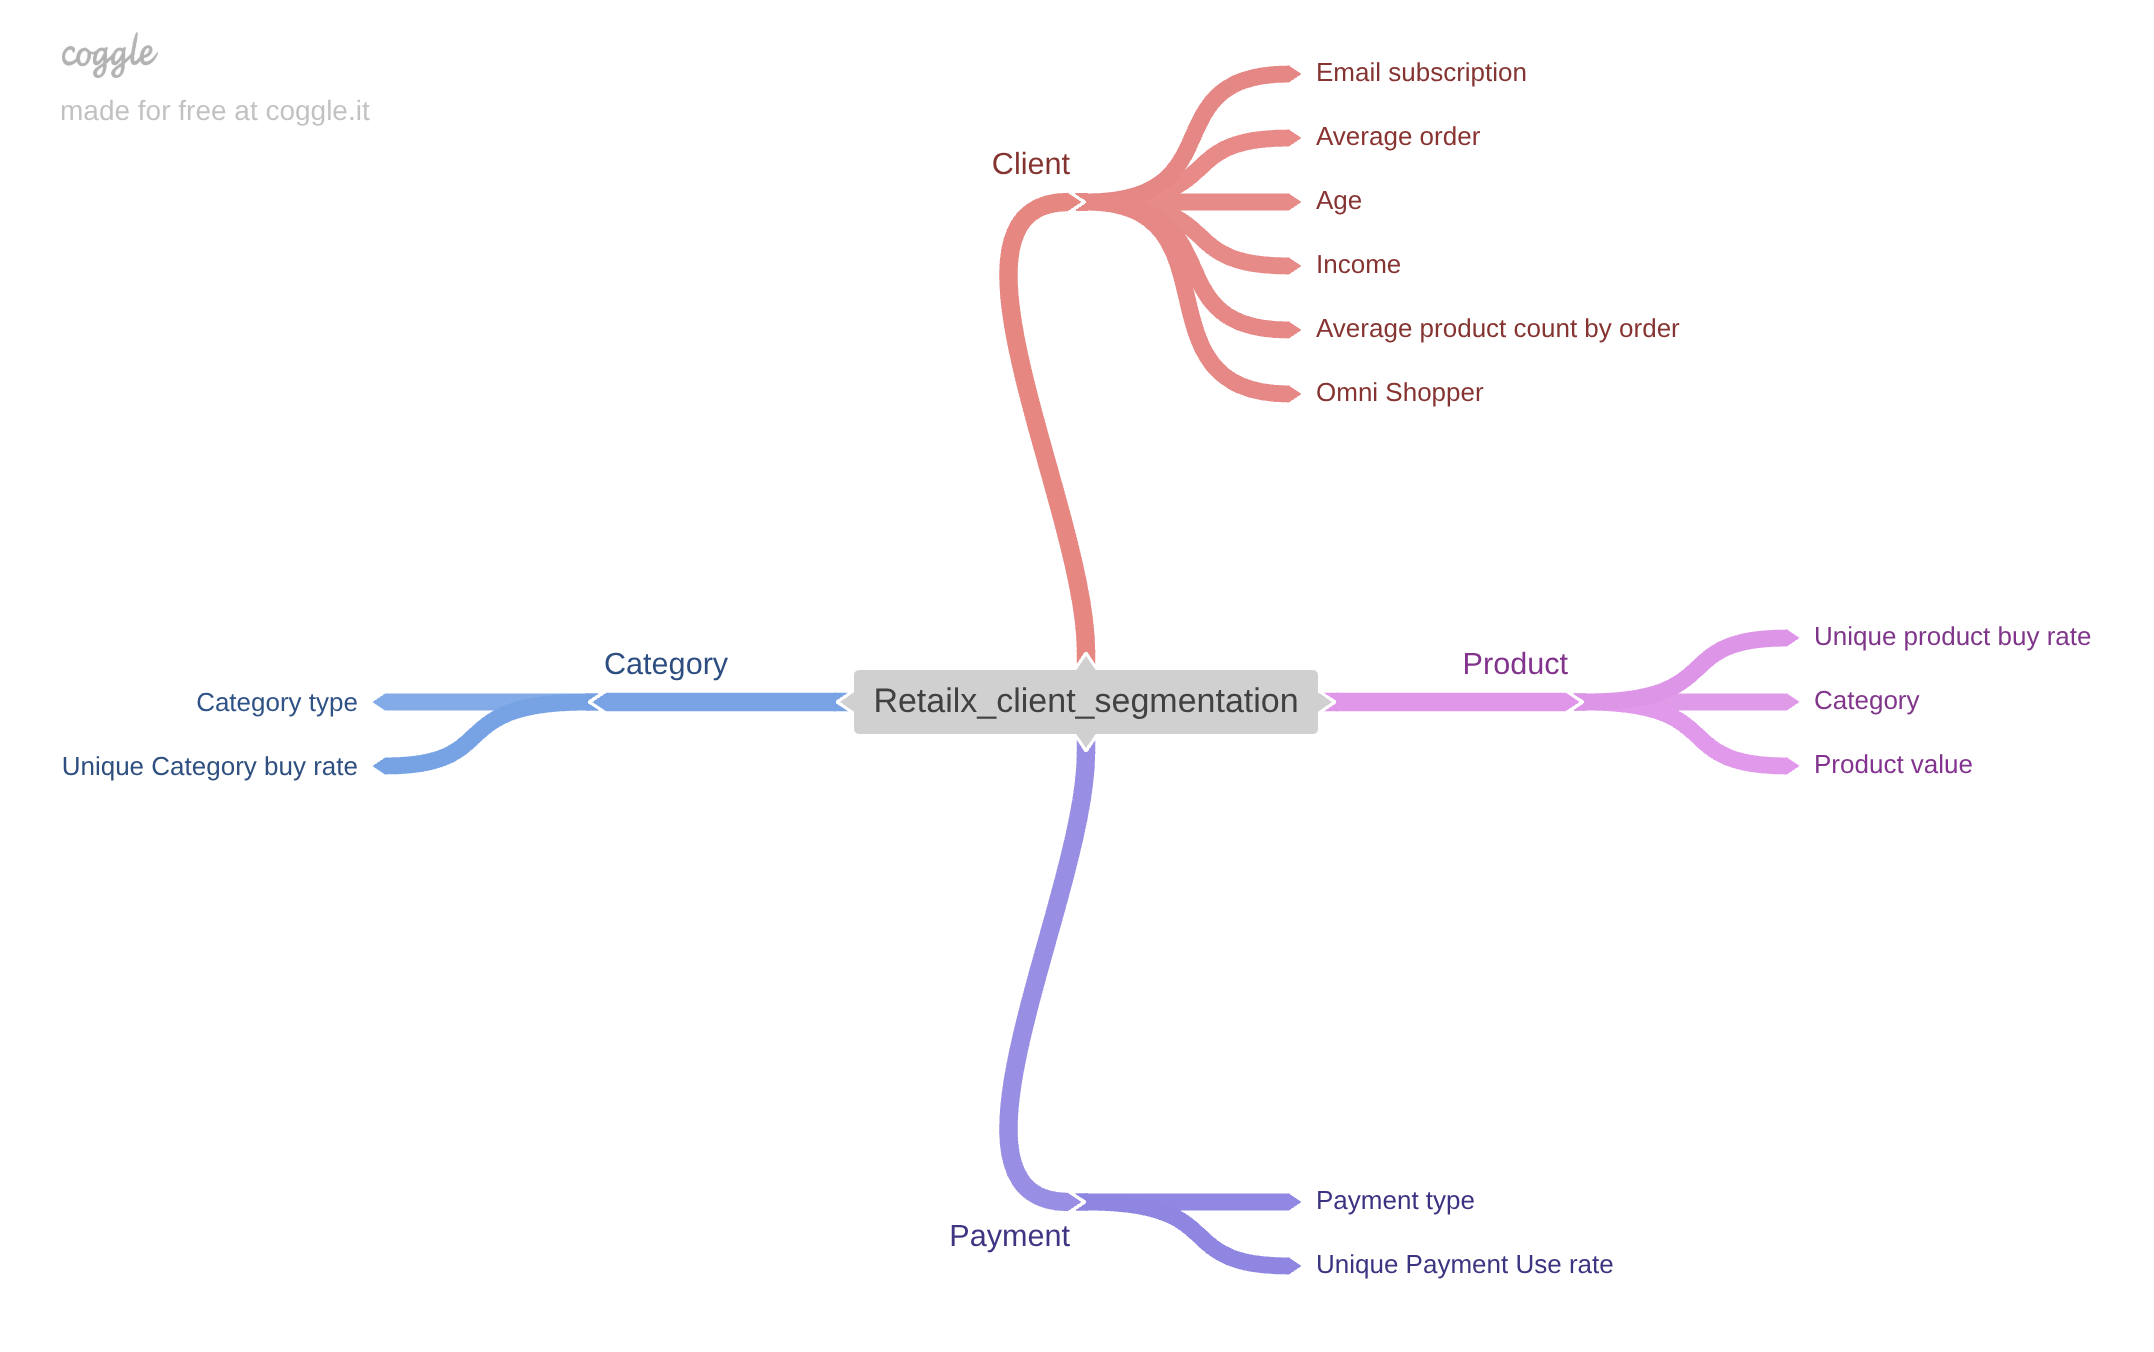

In [91]:
Image('../images/Retailx_client_segmentation.png')

## 4.2 Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

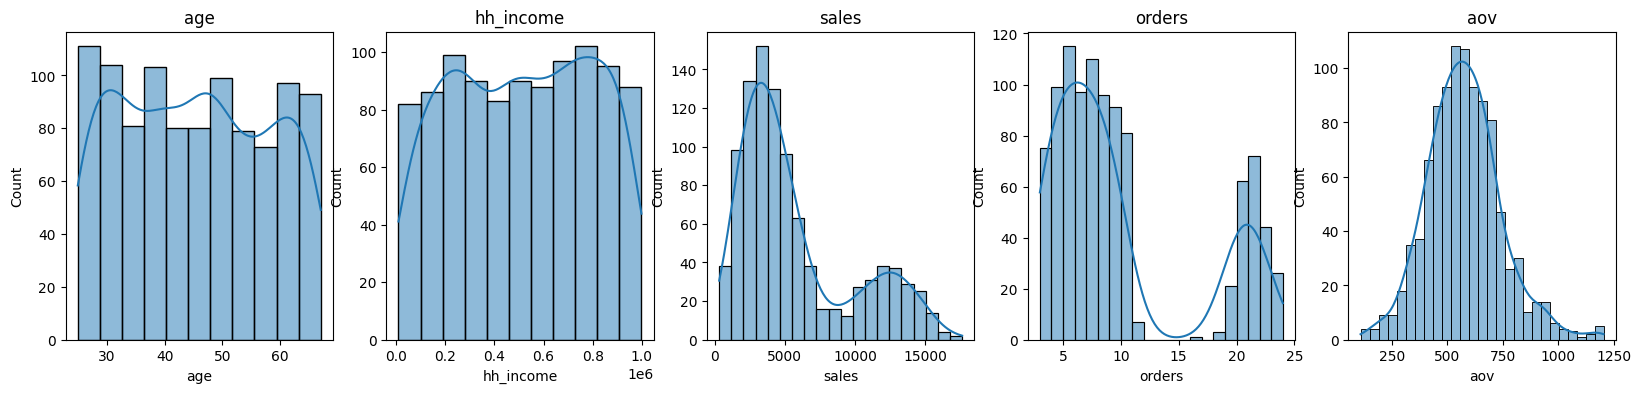

In [108]:
fig, axes = plt.subplots(1,5,figsize=(20,4))

columns = ['age','hh_income','sales','orders','aov']

for ax,col in zip(axes,columns):
    sns.histplot(features_df4[col], kde = True, ax=ax)
    ax.set_title(col)

plt.show

## 4.3 Bivariate Analysis

## 4.4 Multivariate Analysis